In [1]:
import pandas

In [2]:
# 1. Number of times pregnant
# 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# 3. Diastolic blood pressure (mm Hg)
# 4. Triceps skin fold thickness (mm)
# 5. 2-Hour serum insulin (mu U/ml)
# 6. Body mass index (weight in kg/(height in m)^2)
# 7. Diabetes pedigree function
# 8. Age (years)
# 9. Class variable (0 or 1)
database = pandas.read_csv('pima-indians-diabetes.csv', header=None, )

In [3]:
database.head(5)

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
from tensorflow.keras.models import Sequential

In [5]:
model = Sequential()

In [6]:
from tensorflow.keras.layers import Dense

In [7]:
model.add(Dense(activation='relu', bias_initializer='zeros', kernel_initializer='zeros', units=11 , input_dim=8))

In [8]:
Xfield = database.iloc[:,:-1]

In [9]:
Yfield = database.iloc[:,-1]

In [10]:
from tensorflow.keras.optimizers import Adam

In [11]:
model.compile(optimizer=Adam(), loss='binary_crossentropy')

In [12]:
model.add(Dense(activation='relu', bias_initializer='zeros', kernel_initializer='zeros', units=6 ))

In [13]:
model.add(Dense(activation='sigmoid', bias_initializer='zeros', kernel_initializer='zeros', units=1))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                99        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 178
Trainable params: 178
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(8, 11) dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(11,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(11, 6) dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(Xfield, Yfield, test_size=0.23, random_state=42)

In [18]:
learn = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
19/19 [==============================] - 1s 3ms/step - loss: 0.6919
Epoch 2/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6892
Epoch 3/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6868
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6844
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6821
Epoch 6/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6802
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6781
Epoch 8/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6764
Epoch 9/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6745
Epoch 10/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6728
Epoch 11/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6715
Epoch 12/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6696
Epoch 13/100
19/19 [=================

In [21]:
l = pandas.DataFrame(model.history.history)

<AxesSubplot:>

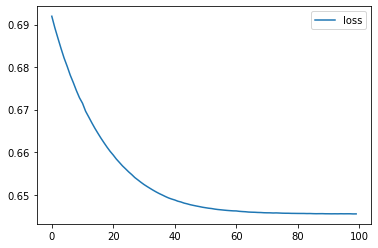

In [22]:
l.plot()